In [ ]:
!pip install tpot

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from joblib import dump
from tpot import TPOTClassifier

In [40]:
data = pd.read_excel('lung_data.xlsx')
data['Result'] = data['Result'].replace({'YES': 1, 'NO': 0})

In [41]:
X = data.iloc[:, 3:]
y = data['Result']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, 
                      config_dict={'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 11)}})
tpot.fit(X_train, y_train)

In [44]:
model = tpot.fitted_pipeline_

In [45]:
y_pred = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.946236559139785


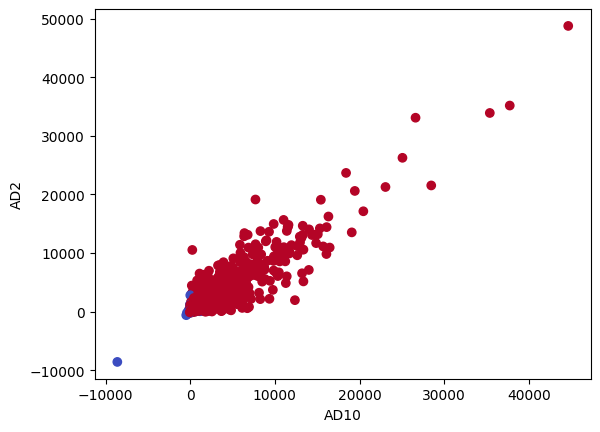

In [47]:
plt.scatter(X['AD10'], X['AD2'], c=y, cmap='coolwarm')
plt.xlabel('AD10')
plt.ylabel('AD2')
plt.show()

In [ ]:
dump(model, 'model.joblib')